## Imports

In [2]:
# Imports 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.linear_model import LinearRegression

## EDA

In [4]:
# Load Data

df = pd.read_csv("../Bootcamp Data/canada_rent.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [6]:
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [7]:
df.tail()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
25766,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25767,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,1450.0,3 Beds,1,810,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25768,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,1125.0,1 Bed,1,520,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
25769,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
25770,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,1285.0,2 Beds,1,700,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True


In [8]:
df.describe()

,rentfaster_id,latitude,longitude,price
count,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142
std,120330.335865,3.603257,17.917001,972.820941
min,820.000000,40.741802,-128.661880,0.000000
25%,415749.000000,45.418785,-114.074660,1600.000000
50%,522379.000000,50.913739,-113.513905,2045.000000
75%,563397.500000,51.093585,-79.401311,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


In [9]:
df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

## Data Preparation

In [11]:
# Dropping categories with missing data, repetitive data, or unneeded data

df = df.drop('address', axis=1)
df = df.drop('link', axis=1)
df = df.drop('rentfaster_id', axis=1)
df = df.drop('latitude', axis=1)
df = df.drop('longitude', axis=1)

In [12]:
# Handling missing data and changing dtypes

# Lease_term: filling nans with mode

df['lease_term'].mode()
df['lease_term'] = df['lease_term'].fillna(value='Long Term')

# Baths: converting to numeric and filling nans with mode

df['baths'] = pd.to_numeric(df['baths'],errors = 'coerce')
df['baths'].mode()
df['baths'] = df['baths'].fillna(value=1)

# Availability_date: filling nans with mode

df['availability_date'].mode()
df['availability_date'] = df['availability_date'].fillna(value='Immediate')

# Cats: filling nans with mode

df['cats'].mode()
df['cats'] = df['cats'].fillna(value=True)

# Dogs: filling nans with mode

df['dogs'].mode()
df['dogs'] = df['dogs'].fillna(value=True)

# Smoking: filling nans with mode

df['smoking'].mode()
df['smoking'] = df['smoking'].fillna(value='Non-Smoking')

# Sq_feet: converting to numeric and filling with mean

df['sq_feet'] = pd.to_numeric(df['sq_feet'],errors = 'coerce')
df['sq_feet'].mean()
df['sq_feet'] = df['sq_feet'].fillna(value=886)

# Beds: filling nans with mode and converting to numeric

df['beds'].mode()
df['beds'] = df['beds'].fillna(value='2 Beds')

df['beds'].replace('1 Bed', 1, inplace=True)
df['beds'].replace('2 Beds', 2, inplace=True)
df['beds'].replace('3 Beds', 3, inplace=True)
df['beds'].replace('4 Beds', 4, inplace=True)
df['beds'].replace('5 Beds', 5, inplace=True)
df['beds'].replace('6 Beds', 6, inplace=True)
df['beds'].replace('7 Beds', 7, inplace=True)
df['beds'].replace('8 Beds', 8, inplace=True)
df['beds'].replace('9 Beds', 9, inplace=True)

In [13]:
# Adjusting repetitive values

# Smoking: combining 'Non-Smoking' and 'Smoke Free Building'

df['smoking'].replace('Smoke Free Building', 'Non-Smoking', inplace=True)
    
# Baths: combining '0' and 'None'

df['baths'].replace('none', 0, inplace=True)
df['baths'].astype(float)

# Beds: combining 0 and 'Studio' and converting to numeric 

df['beds'].replace('none Beds', 0, inplace=True)
df['beds'].replace('Studio', 0, inplace=True)

In [14]:
df.isnull().sum()

city                 0
province             0
lease_term           0
type                 0
price                0
beds                 0
baths                0
sq_feet              0
furnishing           0
availability_date    0
smoking              0
cats                 0
dogs                 0
dtype: int64

## Visualizing Data & Removing Outliers

In [16]:
# Removing price outliers

q_low = df['price'].quantile(0.01)
q_hi  = df['price'].quantile(0.99)

df = df[(df['price'] < q_hi) & (df['price'] > q_low)]

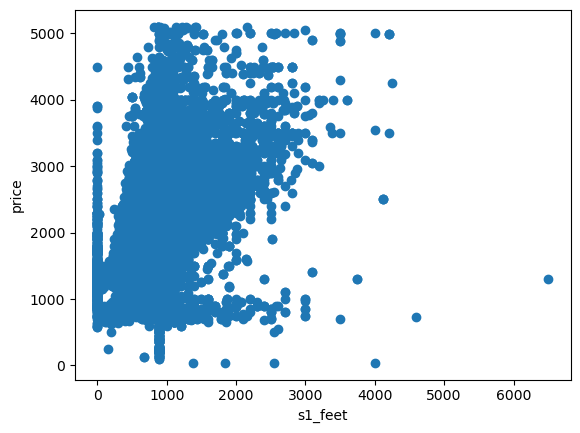

In [17]:
# Price and square feet

plt.scatter(df['sq_feet'], df['price'])
plt.xlabel("s1_feet")
plt.ylabel("price")
plt.show()

In [18]:
# Removing square feet outliers

q_low = df['sq_feet'].quantile(0.01)
q_hi  = df['sq_feet'].quantile(0.99)

df = df[(df['sq_feet'] < q_hi) & (df['sq_feet'] > q_low)]

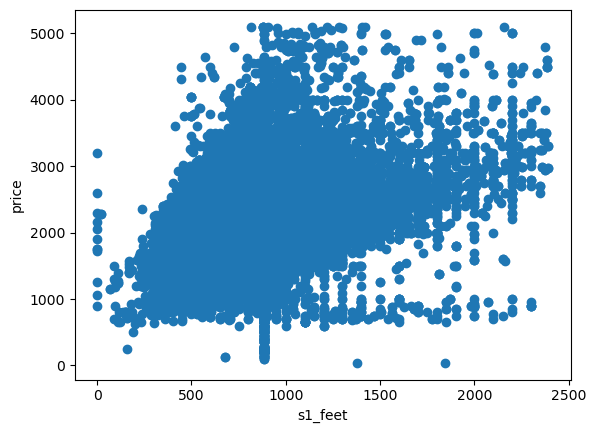

In [19]:
# Price and square feet without outliers

plt.scatter(df['sq_feet'], df['price'])
plt.xlabel("s1_feet")
plt.ylabel("price")
plt.show()

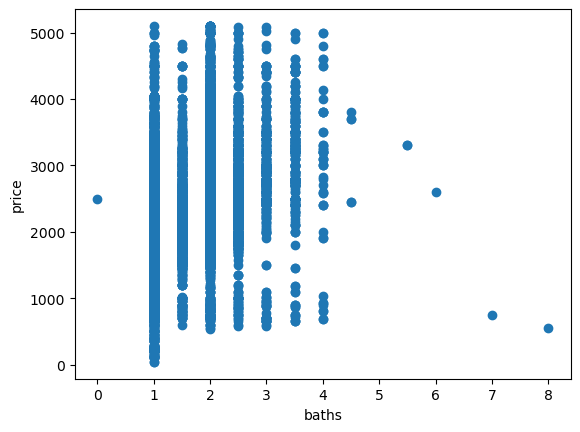

In [20]:
# Price and baths 

plt.scatter(df['baths'], df['price'])
plt.xlabel("baths")
plt.ylabel("price")
plt.show()

In [21]:
# Removing bath outliers

q_low = df['baths'].quantile(0.01)
q_hi  = df['baths'].quantile(0.99)

df = df[(df['baths'] < q_hi) & (df['baths'] > q_low)]

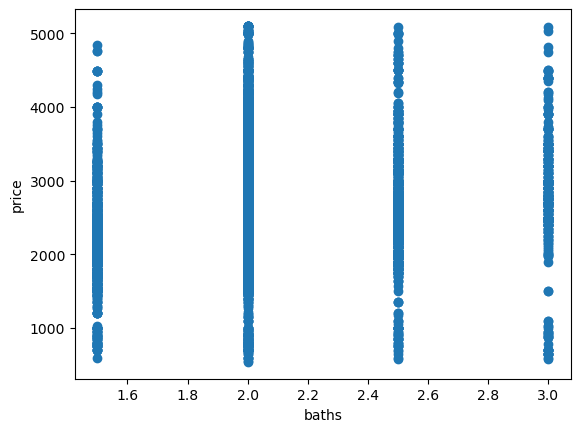

In [22]:
# Price and baths without outliers

plt.scatter(df['baths'], df['price'])
plt.xlabel("baths")
plt.ylabel("price")
plt.show()

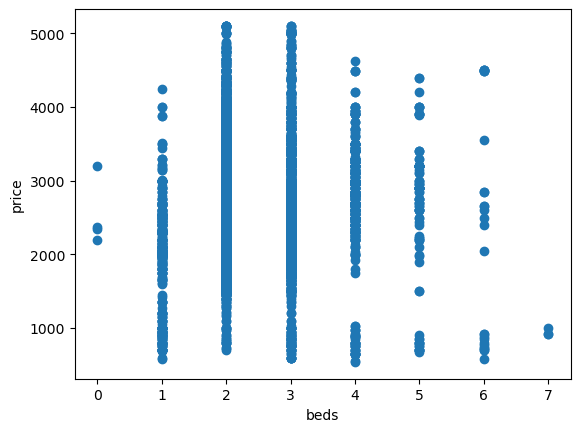

In [23]:
# Price and beds

plt.scatter(df['beds'], df['price'])
plt.xlabel("beds")
plt.ylabel("price")
plt.show()

In [24]:
# Removing beds outliers

q_low = df['beds'].quantile(0.01)
q_hi  = df['beds'].quantile(0.99)

df = df[(df['beds'] < q_hi) & (df['beds'] > q_low)]

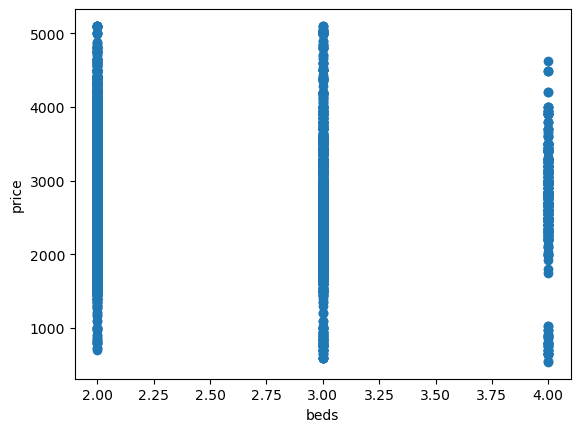

In [25]:
# Price and beds without outliers

plt.scatter(df['beds'], df['price'])
plt.xlabel("beds")
plt.ylabel("price")
plt.show()

In [26]:
df.isnull().sum()

city                 0
province             0
lease_term           0
type                 0
price                0
beds                 0
baths                0
sq_feet              0
furnishing           0
availability_date    0
smoking              0
cats                 0
dogs                 0
dtype: int64

In [27]:
df = df.reset_index()

## Encoding Data

In [29]:
# Encoding categorical data

encoder = OneHotEncoder(drop='first', sparse_output = False)

encode_cols = encoder.fit_transform(df[['cats', 'dogs', 'smoking', 'availability_date', 'furnishing', 'type', 'province', 'city', 'lease_term']])

new_df = pd.DataFrame(encode_cols, columns= encoder.get_feature_names_out(['cats', 'dogs', 'smoking', 'availability_date', 'furnishing', 'type', 'province', 'city', 'lease_term']))

df = df.drop(columns=['cats', 'dogs', 'smoking', 'availability_date', 'furnishing', 'type', 'province', 'city', 'lease_term']).join(new_df)

## Feature Selection

In [31]:
# Price and correlations

df.corr(method='pearson')['price'].nlargest(6)

price               1.000000
city_Toronto        0.485898
province_Ontario    0.401469
index               0.308589
dogs_True           0.182067
cats_True           0.172083
Name: price, dtype: float64

In [32]:
# Selecting features of interest

df_filtered = df[['price', 'baths', 'sq_feet', 'beds', 'province_Ontario', 'city_Toronto']]

In [33]:
# Splitting data 

x = df_filtered.drop('price', axis=1)
y = df_filtered['price']

In [34]:
# Looping over polynomial degrees

train_rmse_errors = []
test_rmse_errors = []

# Loop over polynomial degrees
for d in range(1, 16):  
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.15, random_state=1)
    
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


KeyboardInterrupt



In [ ]:
# Train rmse errors
train_rmse_errors

In [ ]:
# Test rmse errors
test_rmse_errors

In [35]:
# Polynomial features 

poly_converter = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly_converter.fit_transform(x)

## Train/Test Split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.15, random_state=1)

## Scaling Data

In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# LassoCV Model

In [41]:
# Training model 

lassocv_mod = LassoCV(eps=0.01,n_alphas=300,cv=10)
lassocv_mod.fit(x_train, y_train)

LassoCV(cv=10, eps=0.01, n_alphas=300)

In [42]:
# Alpha 

lassocv_mod.alpha_

3.469776404529475

In [43]:
# Metrics 

y_pred = lassocv_mod.predict(x_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(407.7275710065149, 316032.7129529515, 562.1678690150759)

In [44]:
# Coefficients

lassocv_mod.coef_

# Non-zero coefficients

poly_names = poly_converter.get_feature_names_out(input_features=x.columns)
lasso_coefs = lassocv_mod.coef_
non_zero = lasso_coefs != 0

non_zero = pd.DataFrame({'Feature': poly_names[non_zero], 'Coefficient': lasso_coefs[non_zero]})

non_zero

,Feature,Coefficient
0,baths,1.120724e+02
1,sq_feet,1.670387e+02
2,beds,-2.391754e+01
3,sq_feet city_Toronto,2.050028e+02
4,beds province_Ontario,9.268795e+01
5,province_Ontario^2,6.787733e+00
6,baths sq_feet city_Toronto,5.657573e+01
7,sq_feet^2 city_Toronto,1.866719e+01
8,sq_feet beds^2,-6.839458e+01
9,sq_feet province_Ontario city_Toronto,4.370224e+00


# ElasticNetCV Model

In [46]:
# Training model

elasticcv_mod = ElasticNetCV(l1_ratio=[.1, .3, .5, .7, .9, 1], eps=0.01, n_alphas=200, max_iter=10000)

elasticcv_mod.fit(x_train, y_train)

ElasticNetCV(eps=0.01, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1], max_iter=10000,
             n_alphas=200)

In [47]:
# Best ratio 

elasticcv_mod.l1_ratio_

1.0

In [48]:
# Alpha 

elasticcv_mod.alpha_

3.469776404529475

In [49]:
# Coefficients 

elasticcv_mod.coef_

# Non-zero coefficients

poly_names = poly_converter.get_feature_names_out(input_features=x.columns)
elastic_coefs = elasticcv_mod.coef_
non_zeros = elastic_coefs != 0

non_zeros = pd.DataFrame({'Feature': poly_names[non_zeros], 'Coefficient': lasso_coefs[non_zeros]})

non_zeros

,Feature,Coefficient
0,baths,1.120724e+02
1,sq_feet,1.670387e+02
2,beds,-2.391754e+01
3,sq_feet city_Toronto,2.050028e+02
4,beds province_Ontario,9.268795e+01
5,province_Ontario^2,6.787733e+00
6,baths sq_feet city_Toronto,5.657573e+01
7,sq_feet^2 city_Toronto,1.866719e+01
8,sq_feet beds^2,-6.839458e+01
9,sq_feet province_Ontario city_Toronto,4.370224e+00


In [50]:
# Metrics

y_pred = elasticcv_mod.predict(x_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(407.7275710065149, 316032.7129529515, 562.1678690150759)

# GridSearchCV Model

In [52]:
# Choosing more x data 

df_filtered2 = df[['price', 'baths', 'sq_feet', 'beds', 'province_Ontario', 'city_Toronto', 'type_House', 'city_Vancouver']]

In [53]:
# Removing more price outliers

df_filtered2.drop(df_filtered2[df_filtered2['price'] == 29990.0].index)

,price,baths,sq_feet,beds,province_Ontario,city_Toronto,type_House,city_Vancouver
0,2495.0,2.5,1403.0,2,0.0,0.0,0.0,0.0
1,2695.0,2.5,1496.0,3,0.0,0.0,0.0,0.0
2,2295.0,2.5,1180.0,2,0.0,0.0,0.0,0.0
3,2095.0,2.5,1403.0,2,0.0,0.0,0.0,0.0
4,2495.0,2.5,1403.0,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7522,2199.0,2.0,1141.0,2,0.0,0.0,0.0,0.0
7523,2599.0,2.0,1080.0,4,0.0,0.0,0.0,0.0
7524,2125.0,3.0,1366.0,3,0.0,0.0,0.0,0.0
7525,2199.0,3.0,1366.0,3,0.0,0.0,0.0,0.0


In [54]:
# Train/Test Split

x = df_filtered2.drop('price', axis=1)
y = df_filtered2['price']

poly_converter = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly_converter.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.15, random_state=1)

In [55]:
# Scaling data 

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
# Base model using Lasso

model = LassoCV()

In [57]:
# Params

params = {'eps':[0.01], 'n_alphas':[200, 250, 300], 'max_iter':[10000]}

In [58]:
# Training model

grid_mod = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=10, verbose=1)
grid_mod.fit(x_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=LassoCV(),
             param_grid={'eps': [0.01], 'max_iter': [10000],
                         'n_alphas': [200, 250, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [59]:
# Best estimator

grid_mod.best_estimator_

LassoCV(eps=0.01, max_iter=10000, n_alphas=200)

In [60]:
# Metrics

y_pred = grid_mod.predict(x_test)

# Obtain metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(394.52982431724746, 292736.9177916873, 541.0516775611063)

In [128]:
# Predictive evaluation using other data from RentFaster.ca

# Sample used: Price: 2343, baths: 1, sq_feet: 483, beds: 1, province_Ontario: 1, city_Toronto: 1, type_House: 0, city_Vancouver: 0

my_data = np.array([1, 438, 1, 1, 1, 0, 0]).reshape(1, -1)

my_data = np.pad(my_data, (0, 784), 'constant')

grid_mod.predict(my_data)

array([83033.68045735,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
        2620.56048148,  2620.56048148,  2620.56048148,  2620.56048148,
      